In [1]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
uploaded = files.upload()

Saving startup_funding.csv to startup_funding.csv
Saving weight-height.csv to weight-height.csv


In [3]:
data = pd.read_csv("startup_funding.csv")
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
Amt = data["AmountInUSD"]
Amt = Amt.dropna()
Amt = Amt.str.replace(",","")
Amt = pd.to_numeric(Amt)
print(type(Amt[0]))
Amt.head()

<class 'numpy.int64'>


0    1300000
3     500000
4     850000
5    1000000
6    2600000
Name: AmountInUSD, dtype: int64

In [5]:
pop_avg = Amt.mean()
Pop_min = Amt.min()
pop_max = Amt.max()
print(pop_avg, Pop_min, pop_max)

12031073.099016393 16000 1400000000


In [6]:
pop = Amt
sample_size = 100
sample = pop.sample(sample_size, random_state = 1)
sample.shape

(100,)

In [7]:
sample_avg = sample.mean()
sample_min = sample.min()
sample_max = sample.max()
print(pop_avg, " ", sample_avg)
print(pop_max, " ", sample_min)
print(pop_max, " ", sample_max)

12031073.099016393   24592930.0
1400000000   18000
1400000000   1400000000


In [8]:
df = data.copy()

In [9]:
df['CityLocation'].fillna('', inplace = True )
df['CityLocation'].replace('Delhi', 'New Delhi', inplace = True)
df['CityLocation'].replace('bangalore', 'Bangalore', inplace = True)
df["CityLocation"].replace("SFO / Bangalore", "Bangalore", inplace = True)
df["CityLocation"].replace("Seattle / Bangalore", "Bangalore", inplace = True)

DF = df[ (df["CityLocation"] == 'Bangalore') | (df['CityLocation'] == 'New Delhi') ]
DF.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
11,11,06/07/2017,Minjar,Technology,Cloud Solutions provider,Bangalore,"Blume Ventures, Contrarian Capital India Partn...",Seed Funding,NaN,NaN


In [10]:
X = DF['AmountInUSD']
X = X.dropna()
X = X.str.replace(",","")
X = pd.to_numeric(X)
X.head()

0      1300000
5      1000000
8      8500000
13     1000000
19    18500000
Name: AmountInUSD, dtype: int64

In [11]:
POP_Avg = X.mean()
POP_Min = X.min()
POP_Max = X.max()
print(POP_Avg, POP_Min, POP_Max)

17993088.21970921 18000 1400000000


In [12]:
sample_size = 50
Sample = X.sample(sample_size, random_state=1)
Sample_Avg = Sample.mean()
Sample_Min = Sample.min()
Sample_Max = Sample.max()
print(POP_Avg, "  ", Sample_Avg)
print(POP_Min, "  ", Sample_Min)
print(POP_Max, "  ", Sample_Max)

17993088.21970921    16060600.0
18000    50000
1400000000    400000000


In [13]:
df = data.copy()
df['CityLocation'].fillna('', inplace = True)
df['CityLocation'].replace('Delhi', 'New Delhi', inplace = True)
df['CityLocation'].replace('Gurgaon', 'New Delhi', inplace = True)
df['CityLocation'].replace('Noida', 'New Delhi', inplace = True)
df['CityLocation'].replace('bangalore', 'Bangalore', inplace = True)
df["CityLocation"].replace("SFO / Bangalore", "Bangalore", inplace = True)
df["CityLocation"].replace("Seattle / Bangalore", "Bangalore", inplace = True)


In [14]:
DF = pd.read_csv("weight-height.csv")
DF.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [15]:
DF['Height'].mean()

66.36755975482106

In [16]:
sample_means = []
for x in range(1,1000) :
    s = DF['Height'].sample(n = 30)
    sample_means.append(s.mean())

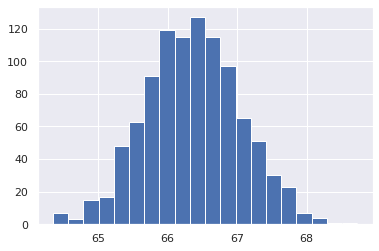

In [17]:
plt.hist(sample_means, bins = 20)
plt.show()

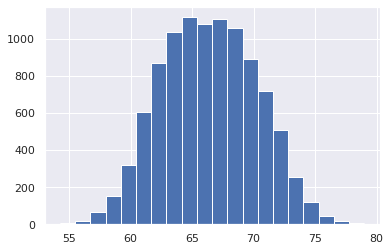

In [18]:
plt.hist(DF['Height'], bins = 20)
plt.show()